***RADAKOVIC OGNJEN 2019230431***

In [ ]:
import numpy as np  #importing libraries
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv 

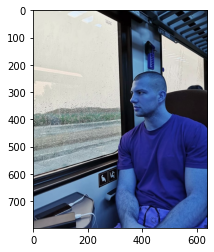

In [ ]:
img_cv = cv.imread("/content/img.JPG") #image load  
plt.imshow(img_cv) #image placement

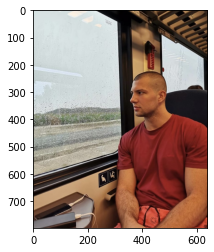

In [ ]:
s=cv.cvtColor(img_cv, cv.COLOR_BGR2RGB) #converting blue, green, red array to red, green, blue array
plt.imshow(s) #image placement

In [ ]:
def getHistograms(image):  #function that loads histogram(probability distribution function) and CDF(cumulative distribution function) graphs
  histGray, binsGray = np.histogram(image.flatten(), 256, [0,255]) # Note: bins+1
  cdf = np.cumsum(histGray)
  cdfProbability = cdf/cdf.max()


  fig = plt.figure(figsize=(18, 6))
  plt.subplot(1,3,1)
  plt.imshow(image, cmap='gray')
  plt.subplot(1,3,2, xlabel="Intensity value",ylabel="Num of occucrences")
  s0 = plt.hist(image.flatten(), 256, [0,255])
  plt.subplot(1,3,3, xlabel="Intensity value par color",ylabel="Cumulativ probability")
  plt.plot(binsGray[:-1], cdfProbability)


  return histGray, binsGray, cdf, cdfProbability

In [ ]:
def getCorrection(picture, gamma):  #function that applies gamma correction to image
  imageS_correction = (255*(picture/255)**(1/gamma)).astype('uint8')
  return imageS_correction

In [ ]:
def contrastFix(photo):   #function that corrects contrast on image
  w,  h = photo.shape
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask-cdf_mask.min())*255/(w*h-cdf_mask.min())
  cdf_equalized = np.ma.filled(cdf_mask, 0).astype('uint8')
  img_equalized = cdf_equalized[photo]
  return img_equalized

In [ ]:
def freqDomain(pic):    #function that returns image in frequency domain
  f = np.fft.fft2(pic)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20*np.log(np.abs(fshift))

  plt.figure(figsize=(20,20))
  plt.subplot(121),plt.imshow(pic, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
  plt.show()

In [ ]:
def highPassFilter(art):    #function that applies high pass filter on image in frequency domain
  f = np.fft.fft2(art)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20*np.log(np.abs(fshift))

  h, w = fshift.shape
  c_h, c_w = h//2,w//2

  fshift[c_h-90:c_h+90,c_w-90:c_w+90] = 0

  magnitude_spectrum = 20*np.log(np.abs(fshift))

  f_ish = np.fft.ifftshift(fshift)
  f_inver = np.fft.ifft2(f_ish)
  img_restored = np.abs(f_inver)

  img_new = img_restored.astype(np.uint8)
  img_new1 = magnitude_spectrum.astype(np.uint8)

  return img_new1, img_new

**1)** **Gamma correction**  Gamma correction function is a function that maps luminance levels to compensate the non-linear luminance effect of display devices (or sync it to human perceptive bias on brightness).

The formula:  

*x to the power of 1/γ*,

where γ is a constant, and “^” is the power operator. The value γ is said to be the gamma.

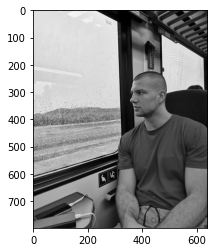

In [ ]:
gray_img_before = s[...,:3].dot([0.299, 0.587, 0.114])  #changing image to gray and showing how it looks before gamma correction
plt.imshow(gray_img_before, cmap='gray')  #image placement

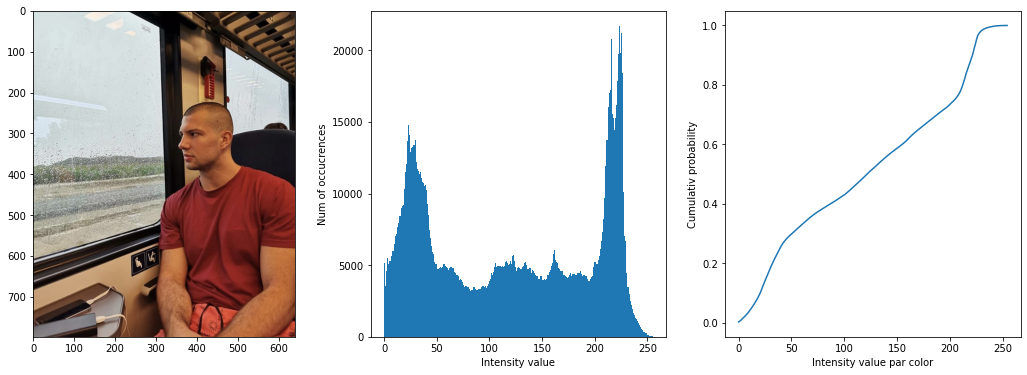

In [ ]:
a, b, c, d = getHistograms(s)  #calling histogram and CDF function before the gamma correction

In [ ]:
gamma1 = 1/2  #setting gamma value
image_corrected = getCorrection(s, gamma1)  #calling function that applies gamma correction to image

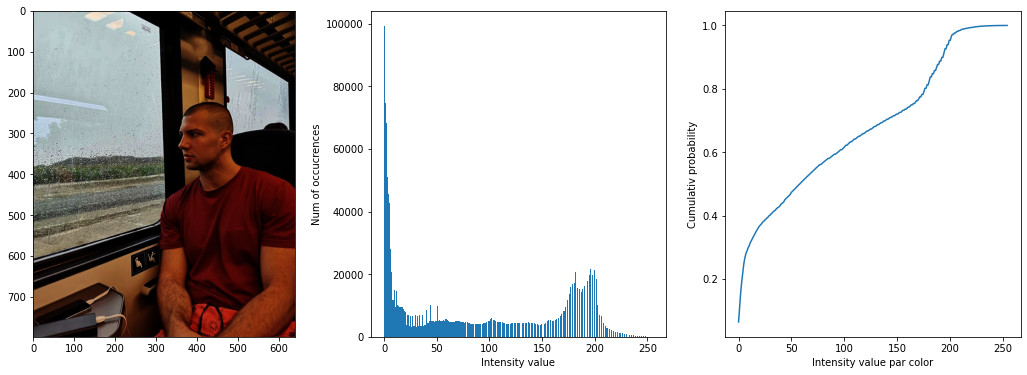

In [ ]:
a, b, c, d = getHistograms(image_corrected)  #calling histogram and CDF function after the gamma correction

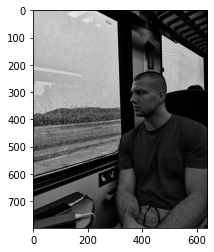

In [ ]:
gray_img_after = image_corrected[...,:3].dot([0.299, 0.587, 0.114]) #changing image to gray and showing how it looks after gamma correction
plt.imshow(gray_img_after, cmap='gray') #image placement

**2)** **Contrast correction**  Contrast adjustment remaps image intensity values to the full display range of the data type. An image with good contrast has sharp differences between black and white.
The function used here is applied to gray image. However, some of the similar functions can be applied to color images as well.


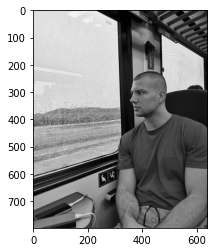

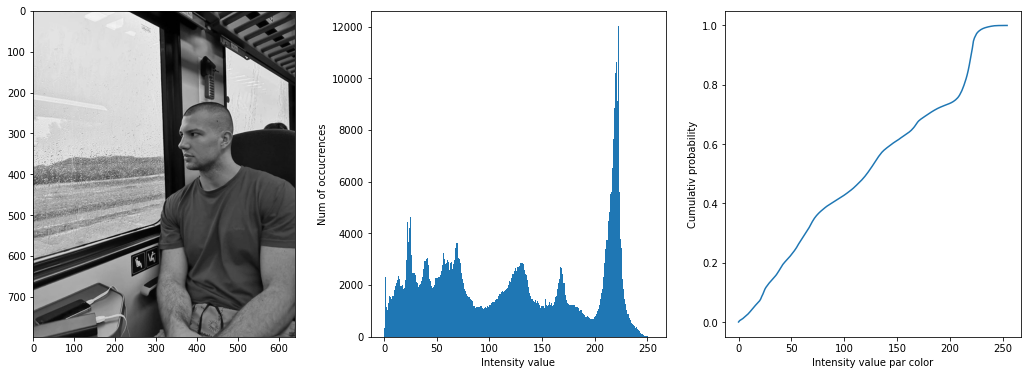

In [ ]:
s1 = cv.imread("/content/img.JPG", 0)  #setting image to gray
plt.imshow(s1, cmap='gray')  #image placement
hist, bins, cdf, cdfProbability = getHistograms(s1) #calling histogram and CDF function before the contrast correction

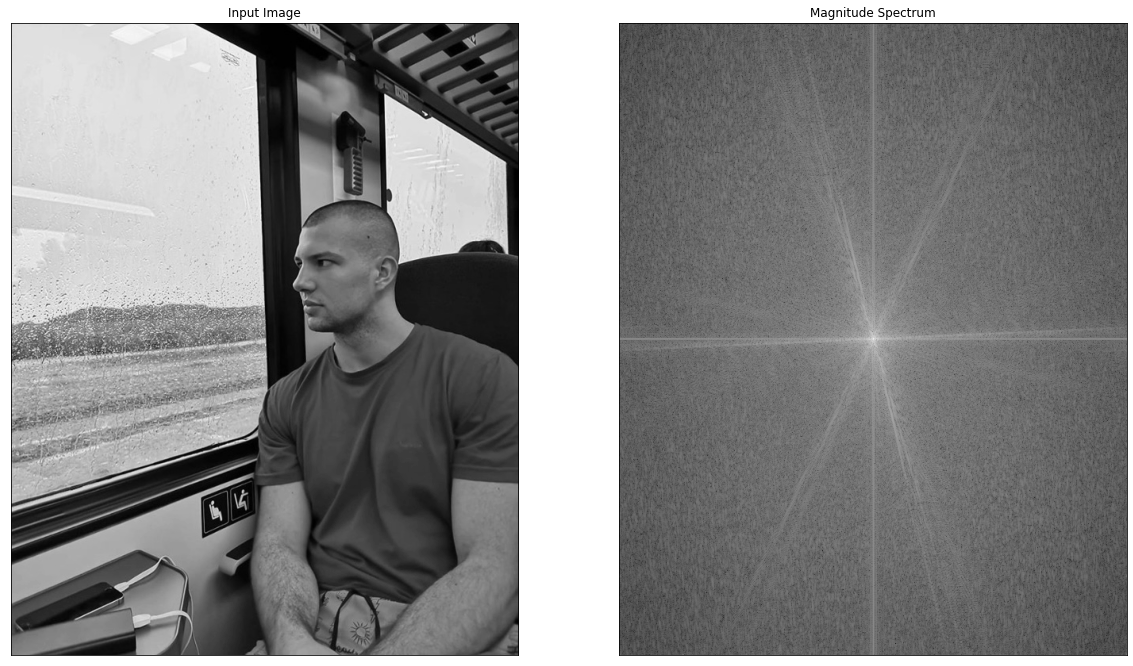

In [ ]:
freqDomain(s1)  #calling function that returns image in frequency domain(right) before fixing contast on image

In [ ]:
img_equalized_contrast = contrastFix(s1)  #calling function that fixes contrast on image 

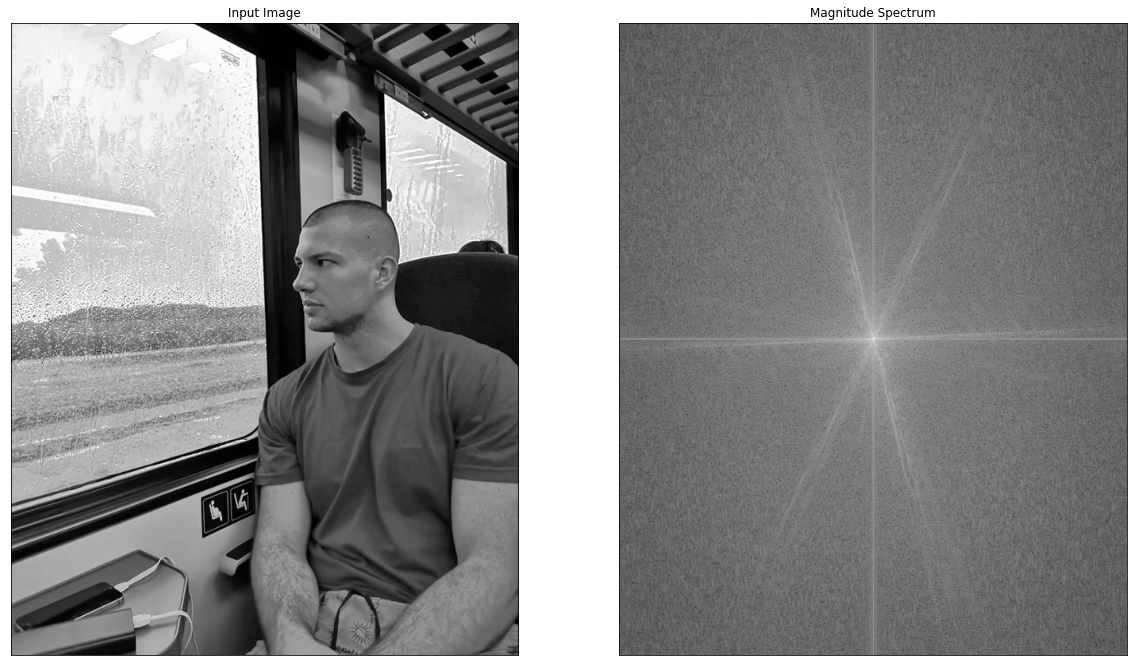

In [ ]:
freqDomain(img_equalized_contrast)  #calling function that returns image in frequency domain(right) after fixing contast on image

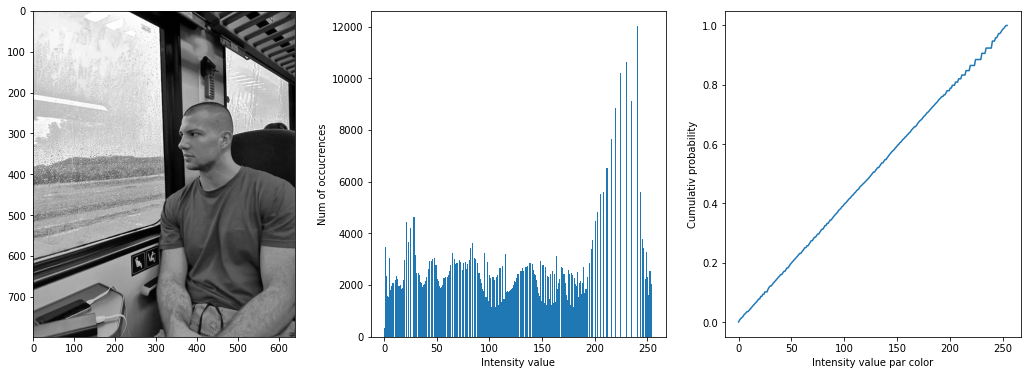

In [ ]:
hist, bins, cdf, cdfProbability = getHistograms(img_equalized_contrast) #calling histogram and CDF function after the contrast correction

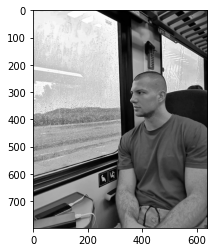

In [ ]:
gray_img_afterrr = img_equalized_contrast  #showing how gray image looks after the contrast fix on image
plt.imshow(gray_img_afterrr, cmap='gray') #image placement

**3)** **High pass filter** 
A high-pass filter can be used to make an image appear sharper. These filters emphasize fine details in the image – exactly the opposite of the low-pass filter. High-pass filtering works in exactly the same way as low-pass filtering; it just uses a different convolution kernel.
While low-pass filtering smooths out noise, high-pass filtering does just the opposite: it amplifies noise.



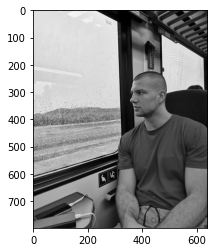

In [ ]:
gray_img_before = s[...,:3].dot([0.299, 0.587, 0.114]) #changing image to gray and showing how it looks before applying high pass filter
plt.imshow(gray_img_before, cmap='gray') #image placement

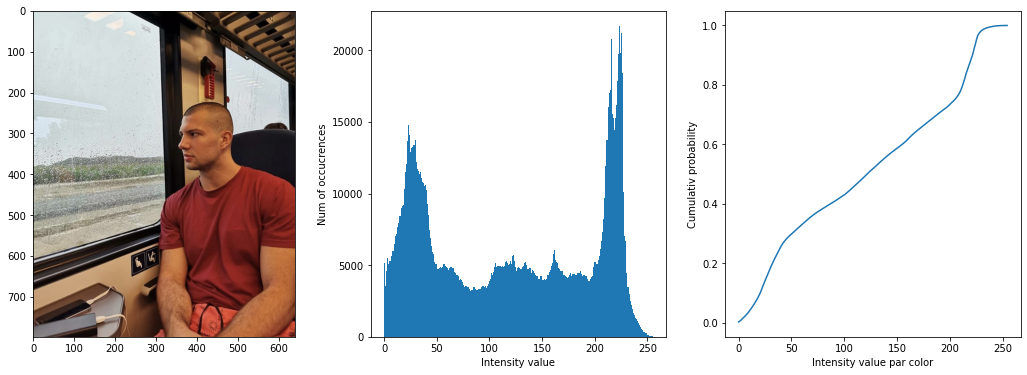

In [ ]:
a, b, c, d = getHistograms(s)  #calling histogram and CDF function before applying high pass filter on image

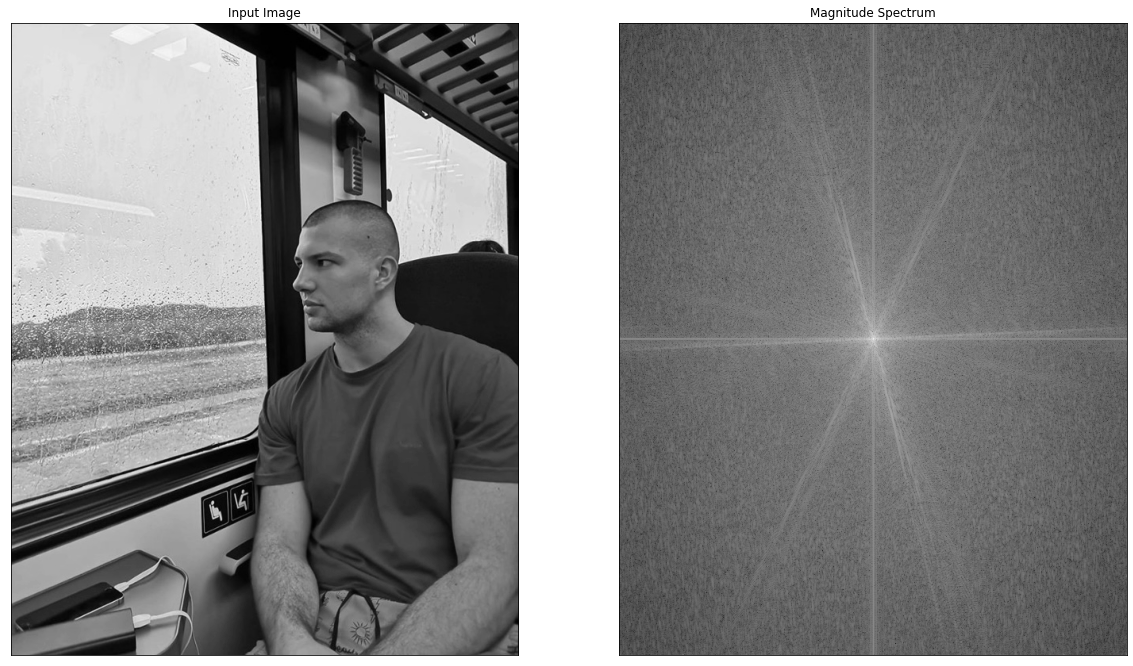

In [ ]:
freqDomain(s1) #calling function that returns image in frequency domain(right) before applying high pass filter on image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


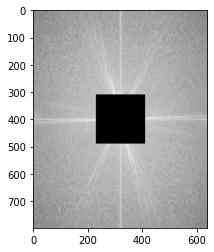

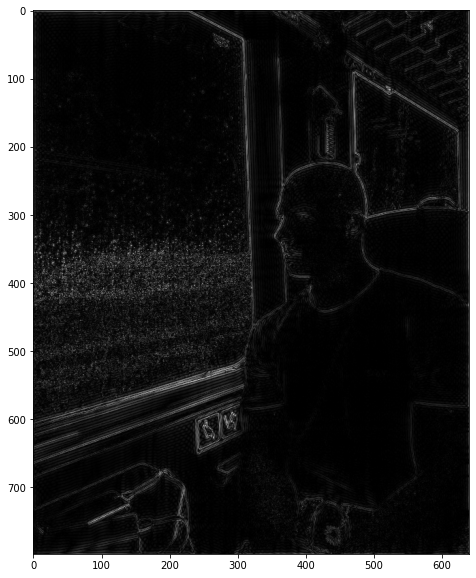

In [ ]:
slika1, slika2 = highPassFilter(s1) #calling function that applies high pass filter on image in frequency domain
plt.imshow(slika1, cmap='gray') #image placement
plt.figure(figsize=(10,10)) #setting image size
plt.imshow(slika2, cmap='gray') #image placement

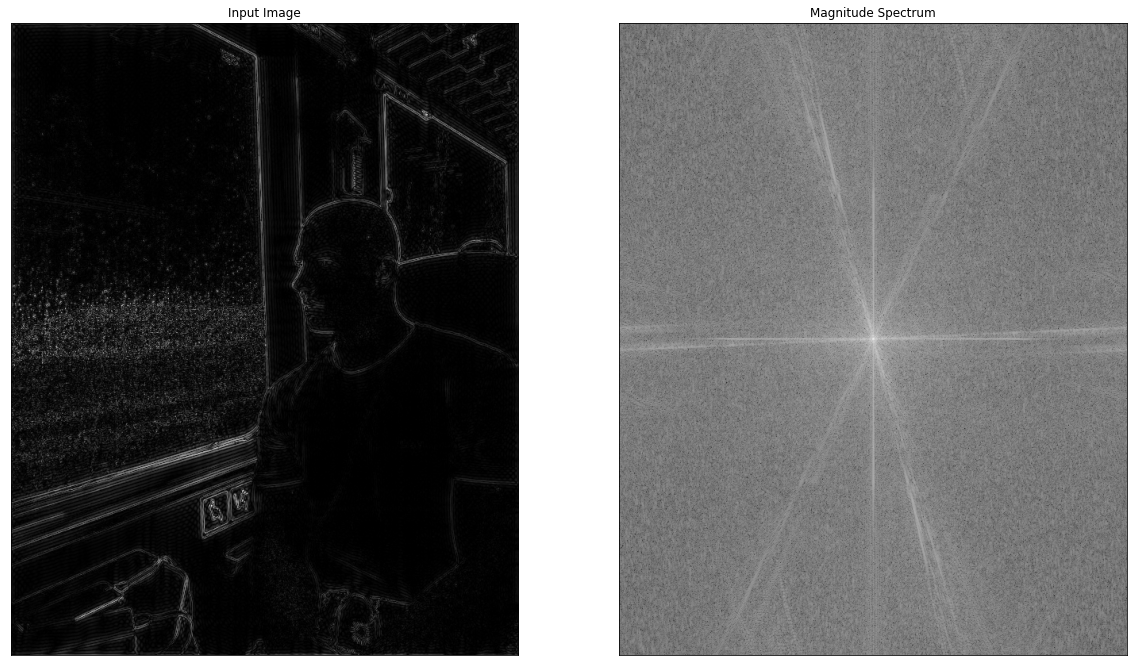

In [ ]:
freqDomain(slika2) #calling function that returns image in frequency domain(right) after applying high pass filter on image

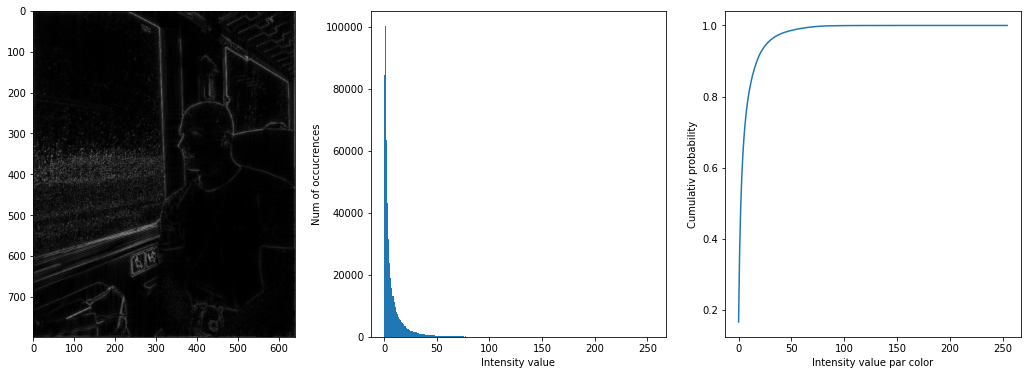

In [ ]:
a, b, c, d = getHistograms(slika2) #calling histogram and CDF function after applying high pass filter on image

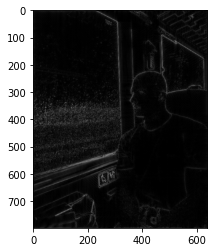

In [ ]:
gray_img_after2 = slika2[...,:3].dot([0.299, 0.587, 0.114]) #changing img to gray and showing how it looks after applying high pass filter
plt.imshow(gray_img_after1, cmap='gray') #image placement